Go to this URL to start R-Colab :  
https://colab.research.google.com/#create=true&language=r

In [ ]:
R.version.string

[1] "R version 4.1.2 (2021-11-01)"

In [ ]:
print(installed.packages())

** Mount Google drive in Colab R

In [ ]:
install.packages("googledrive")
library("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [ ]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AX4XfWhU541HzeSXr6tSBzVV5rXLEcnb5Ip0bvDYvkksAAyK7dpuyVziSg8


In [ ]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.2                         
year           2021                        
month          11                          
day            01                          
svn rev        81115                       
language       R                           
version.string R version 4.1.2 (2021-11-01)
nickname       Bird Hippie                 

In [ ]:
## Packages installed by default
str(allPackage <- installed.packages())
allPackage [, c(1,3:5)]

In [ ]:
library()

This document is generated using `knitr`.  
In RStudio: `File`->`Knit` `Document`.  
`Knitr` then runs my r-code and knit the output into a nicely formatted code-and-output document.  
Warning: If there is a line in the code that installs a package , `knitr` expect the repository to be explicitly specified: `install.packages(..., repos="....")`

###### Package installation and loading
Package names

In [ ]:
packages <- c("Hmisc","corrplot","PerformanceAnalytics","correlation","car","caTools")


Install packages if not already installed

In [ ]:
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages], repos = "http://cran.us.r-project.org" )
}


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘xts’, ‘quadprog’, ‘zoo’, ‘bayestestR’, ‘datawizard’, ‘insight’, ‘parameters’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘bitops’




In [ ]:
# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


corrplot 0.92 loaded

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: carData



In [ ]:
# Importing data

library(readr)
Hcost <- read_csv("https://instruction.bus.wisc.edu/jfrees/jfreesbooks/Regression%20Modeling/BookWebDec2010/CSVData/HospitalCosts.csv", TRUE)

names(Hcost)
dim(Hcost)
ls.str(Hcost)


Rows: 500 Columns: 6

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): AGE, FEMALE, LOS, RACE, TOTCHG, APRDRG


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] "AGE"    "FEMALE" "LOS"    "RACE"   "TOTCHG" "APRDRG"

[1] 500   6

AGE :  num [1:500] 17 17 17 17 17 17 17 16 16 17 ...
APRDRG :  num [1:500] 560 753 930 758 754 347 754 754 753 758 ...
FEMALE :  num [1:500] 1 0 1 1 1 0 1 1 1 1 ...
LOS :  num [1:500] 2 2 7 1 1 0 4 2 1 2 ...
RACE :  num [1:500] 1 1 1 1 1 1 1 1 1 1 ...
TOTCHG :  num [1:500] 2660 1689 20060 736 1194 ...


The structure of the data shows Gender and Race are numeric.  
We need to convert to factor so that calculation is not done on them.  
For example, if they remain numeric as opposed to factors,  
the summary function will produce the mean of Race, with is meaningless.  
For analysis reasons, I am going to create factor variable of these two ariables:  

In [ ]:
Hcost$FAC_FEM <- as.factor(Hcost$FEMALE)
Hcost$FAC_RACE <- as.factor(Hcost$RACE)

# Descriptive Statistics of variables

In [ ]:
#library(dplyr)
sapply(Hcost, summary)

# Checking on missingness
sum(is.na(Hcost))

$AGE
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   5.086  13.000  17.000 

$FEMALE
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   0.512   1.000   1.000 

$LOS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   2.000   2.828   3.000  41.000 

$RACE
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.000   1.000   1.078   1.000   6.000       1 

$TOTCHG
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    532    1216    1536    2774    2530   48388 

$APRDRG
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   21.0   640.0   640.0   616.4   751.0   952.0 

$FAC_FEM
  0   1 
244 256 

$FAC_RACE
   1    2    3    4    5    6 NA's 
 484    6    1    3    3    2    1 


[1] 2

Checking on correlation between cost and the rest of the variables: correlation matrix.
We want to display the correlation coefficients as well as the p-values, so we need to install the packages: "Hmisc","corrplot","PerformanceAnalytics and "correlation"


In [ ]:
library(Hmisc); library(corrplot); library(PerformanceAnalytics) ; library(correlation)

# Correlation matrix
corM <- rcorr(as.matrix(Hcost), type="pearson")

#Instead of displaying the entire corM, let's look at the various parts we can extract

names(corM)


We see that we can choose `$r (correlation matrix)`, `$n (case count)` and  
`$P (the p-values)`.  
Let's round these numbers to 2 digits after decimal.

In [ ]:
round(corM$r,2)
round(corM$P,2)

[1] "r" "n" "P"

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,FAC_FEM,FAC_RACE
AGE,1.00,0.23,-0.07,0.02,0.13,0.15,0.23,0.02
FEMALE,0.23,1.00,0.04,-0.04,-0.06,0.25,1.00,-0.04
LOS,-0.07,0.04,1.00,-0.02,0.62,0.01,0.04,-0.02
RACE,0.02,-0.04,-0.02,1.00,-0.02,-0.04,-0.04,1.00
TOTCHG,0.13,-0.06,0.62,-0.02,1.00,-0.33,-0.06,-0.02
APRDRG,0.15,0.25,0.01,-0.04,-0.33,1.00,0.25,-0.04
FAC_FEM,0.23,1.00,0.04,-0.04,-0.06,0.25,1.00,-0.04
FAC_RACE,0.02,-0.04,-0.02,1.00,-0.02,-0.04,-0.04,1.00


,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,FAC_FEM,FAC_RACE
AGE,NA,0.00,0.13,0.72,0.00,0.00,0.00,0.72
FEMALE,0.00,NA,0.42,0.39,0.18,0.00,0.00,0.39
LOS,0.13,0.42,NA,0.69,0.00,0.91,0.42,0.69
RACE,0.72,0.39,0.69,NA,0.69,0.33,0.39,0.00
TOTCHG,0.00,0.18,0.00,0.69,NA,0.00,0.18,0.69
APRDRG,0.00,0.00,0.91,0.33,0.00,NA,0.00,0.33
FAC_FEM,0.00,0.00,0.42,0.39,0.18,0.00,NA,0.39
FAC_RACE,0.72,0.39,0.69,0.00,0.69,0.33,0.39,NA


To easily see positive and negative correlation among variables, let's use corrplot to visualize the matrix. Especially, method="ellipse" is very useful in seeing the sign of the correlation.

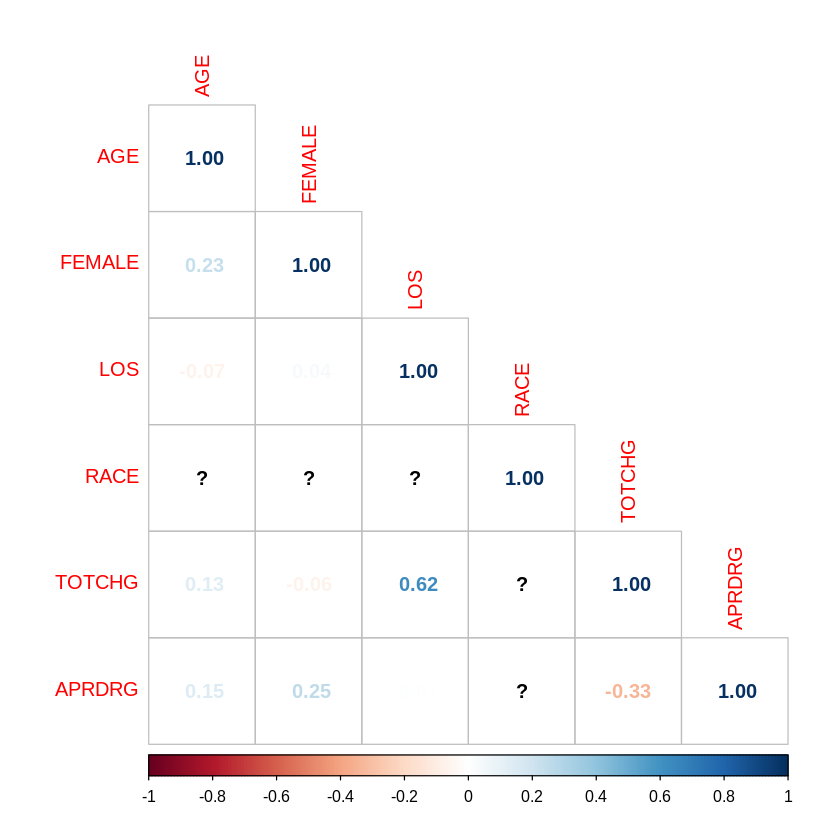

,Parameter,APRDRG,TOTCHG,RACE,LOS,FEMALE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AGE,0.14749692,0.13167968,0.01584962,-0.06863973,0.233979
2,FEMALE,0.25286253,-0.06019504,-0.03843368,0.03576139,NA
3,LOS,0.00505864,0.62319300,-0.01779414,NA,NA
4,RACE,-0.04373690,-0.01816430,NA,NA,NA
5,TOTCHG,-0.33000118,NA,NA,NA,NA


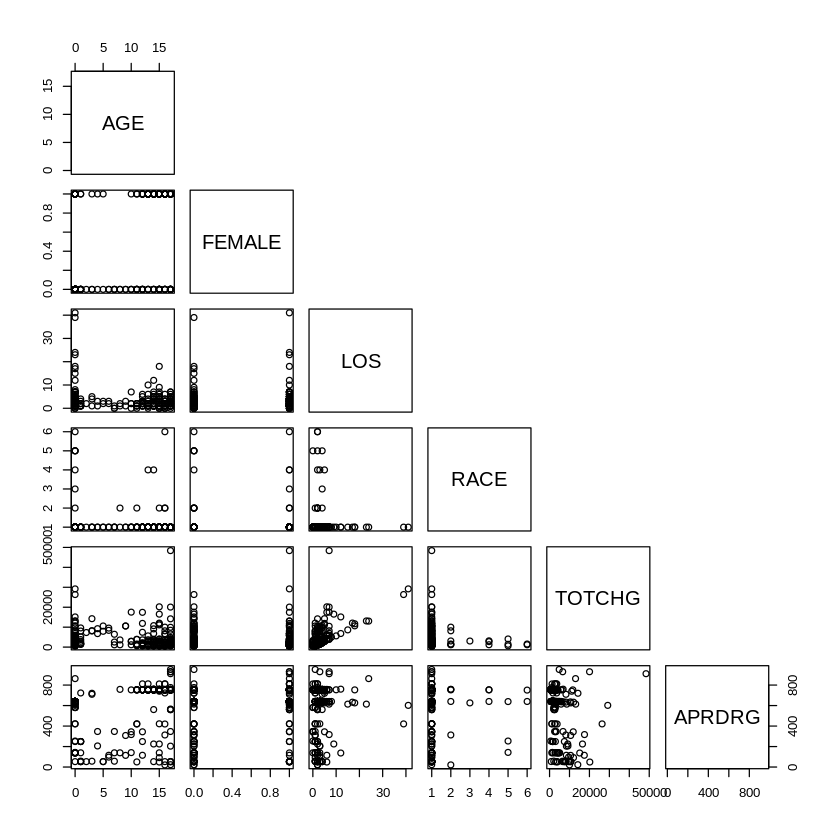

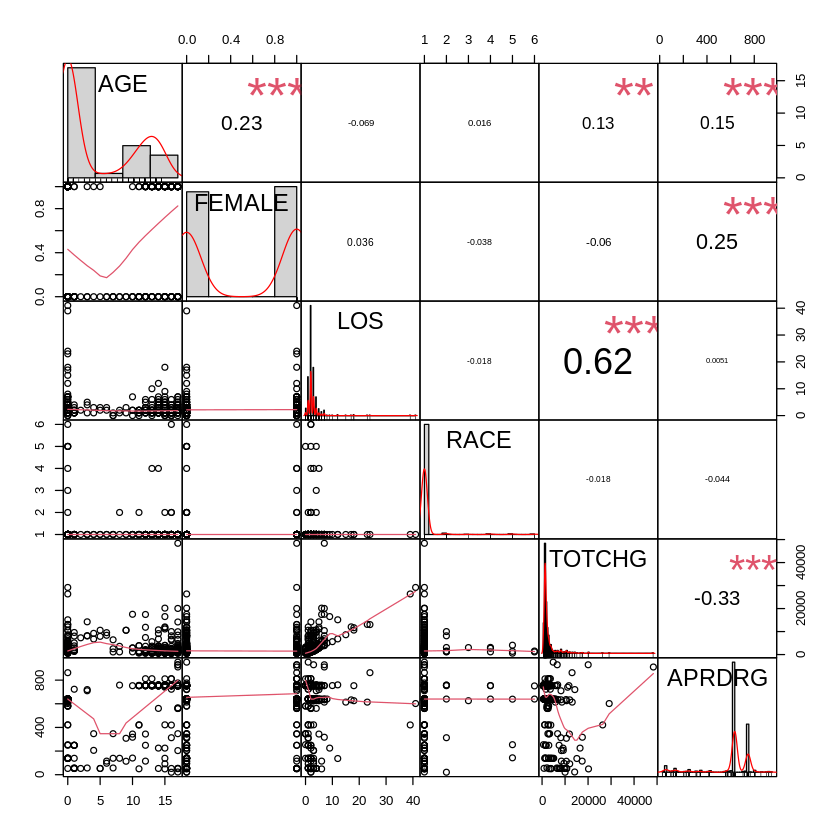

In [ ]:
corrplot(cor(Hcost[1:6]), method = "number" , type ="lower")
# Plotting the correlation, 3 variables at a time, so we don't get a cluttered graph
library(ggplot2)
pairs(Hcost[1:6],upper.panel = NULL)
# Correlation table
correl <- correlation(Hcost)
summary(correl)
chart.Correlation(Hcost[1:6], histogram=TRUE, pch=19)

# Slitting data into training and testing, using caTools package

In [ ]:
library(caTools); library(car)

# To be able to produce the same training and testing data in the future, we set a seed to a randomly picked value.
set.seed(10)
# Splitting the data into 70/30
splitsample <- sample.split(Hcost$TOTCHG,SplitRatio = .7)

train_hcost <- subset(Hcost,splitsample==TRUE)
test_hcost <- subset(Hcost,splitsample==FALSE)

# Building the model with all variables
train_model_all <- lm(train_hcost$TOTCHG ~ ., data = train_hcost)

summary(train_model_all)


The summary statistics of train_model show that the coefficients of AGE, LOS and APRDRG are significantly different from zero, with a confidence level of 0.05, therefore, we will include them in our final linear model.




# Building the model with significant variables only

In [ ]:
train_model_sig <- lm(TOTCHG ~ AGE+LOS+APRDRG , data = train_hcost)

summary(train_model_sig)
names(train_model_sig)
# We check if the number of fitted values is equal to number of observations in the training data
length(train_model_sig$fitted.values)
dim(train_hcost)


Call:
lm(formula = TOTCHG ~ AGE + LOS + APRDRG, data = train_hcost)

Residuals:
    Min      1Q  Median      3Q     Max 
-7159.2  -538.5  -196.9    73.8 15915.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5900.9997   375.3714   15.72  < 2e-16 ***
AGE          111.9048    14.3651    7.79 7.89e-14 ***
LOS          706.3185    26.1254   27.04  < 2e-16 ***
APRDRG        -9.2503     0.5738  -16.12  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1863 on 346 degrees of freedom
Multiple R-squared:  0.7435,	Adjusted R-squared:  0.7412 
F-statistic: 334.3 on 3 and 346 DF,  p-value: < 2.2e-16


[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

[1] 350

[1] 350   8

They are, so we can predict.
Create data frames for predict and residuals of the training data.

In [ ]:
predict_train_df <- data.frame(train_model_sig$fitted.values)
resid_train_df <- data.frame(train_model_sig$residuals)
str(resid_train_df)

'data.frame':	350 obs. of  1 variable:
 $ train_model_sig.residuals: num  -1376 -562 15915 -762 -341 ...


'data.frame':	150 obs. of  1 variable:
 $ predict_test_df: num  2575 551 5647 8082 167 ...


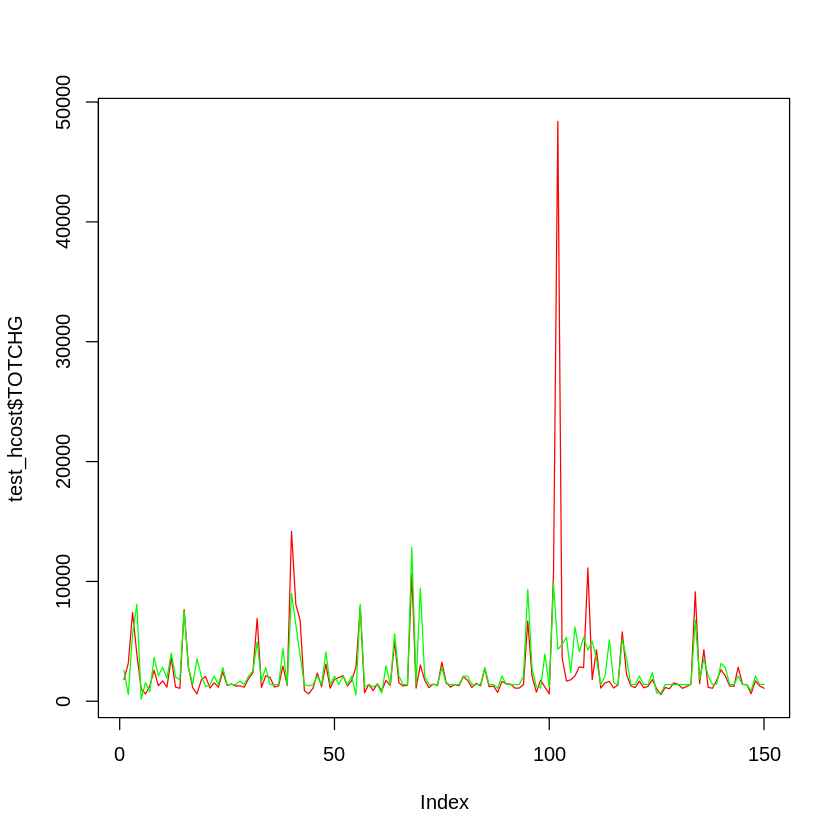

In [ ]:
# Perform prediction using testing data

predict_test_df <- predict(train_model_sig,newdata = test_hcost)
predict_test_df <- data.frame(predict_test_df)
str(predict_test_df)

# Plotting testing data versus predicted testing data

plot(test_hcost$TOTCHG,col="red",type = "l")
lines(predict_test_df,col="green", type = "l")



Linear regression model assumptions verification: let's diagnose our linear model to see if our data does not violate the assumptions


In [ ]:
# Test for auto-correlation in residuals

durbinWatsonTest(train_model_sig)

 lag Autocorrelation D-W Statistic p-value
   1      0.02421334      1.946236   0.492
 Alternative hypothesis: rho != 0

==>> p-values =0.512 >> 0.001, so there is no first order correlation in residuals.

In [ ]:
# Test for collinearity using VIF
vif(train_model_sig)
sqrt(vif(train_model_sig))>5


AGE      LOS   APRDRG 
1.032630 1.008145 1.024618

AGE    LOS APRDRG 
 FALSE  FALSE  FALSE

==> All VIF factors are less than 5, we can conclude that there is no collinearity among the variables retained for the final model.

# Test for linearity and homoscedasticity using plot of Residual versus fitted data

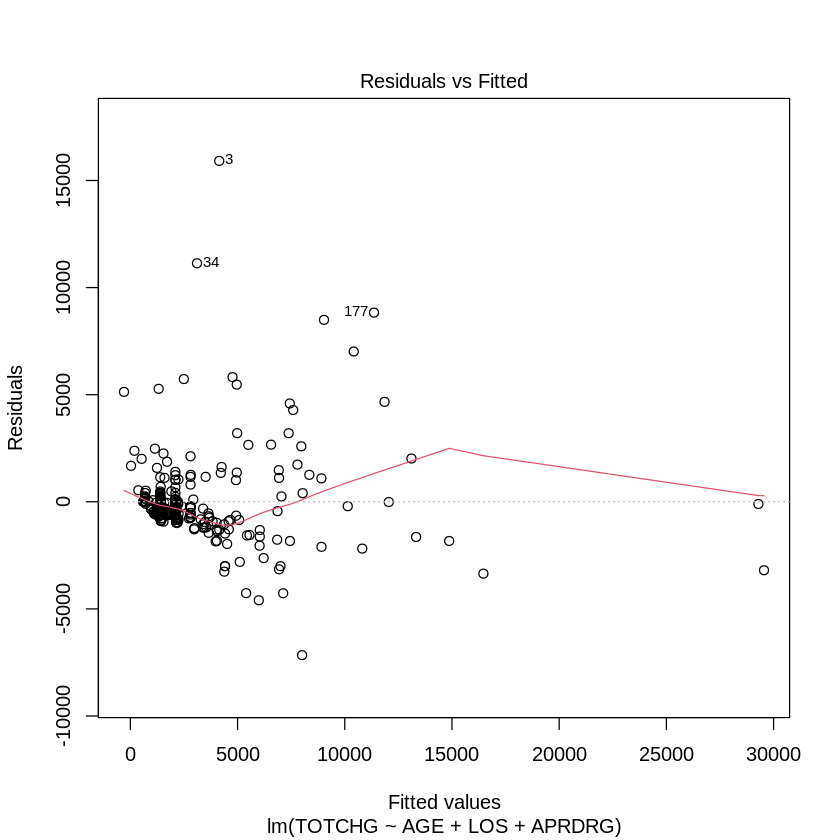

In [ ]:
plot(train_model_sig,which=1)

==>> Except from three data points with large residuals (3,34 and 177), the data is fairly spread around the x-axis (y=0)


Test for normality of the data using quantile-quantile plot

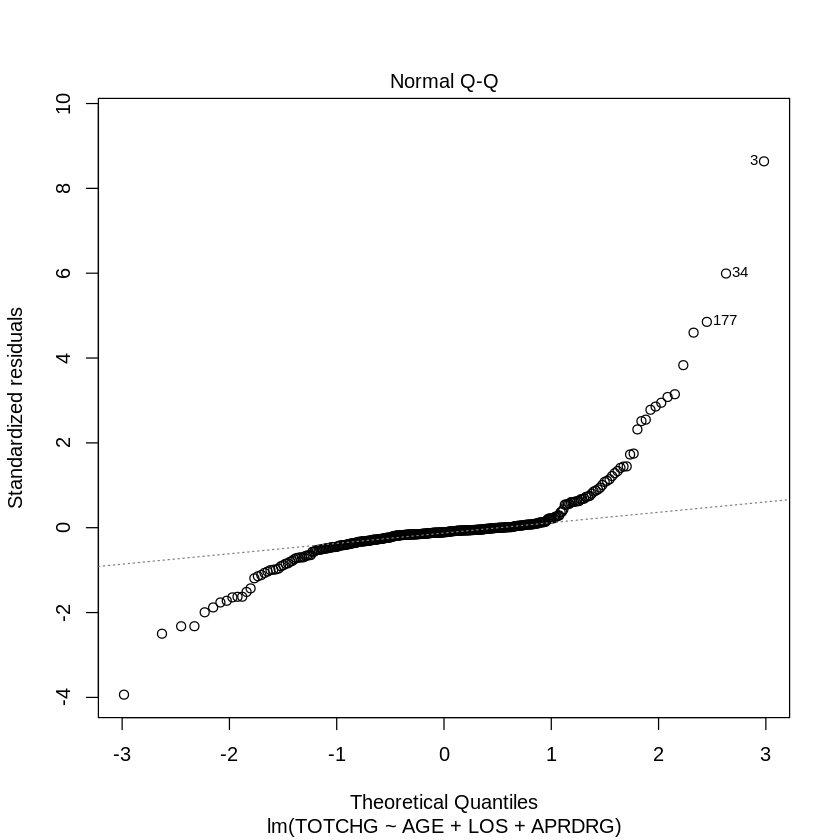

In [ ]:
plot(train_model_sig,which=2)

The data in most cases aligns with the 45 degree line, meaning the data is fairly normally distributed


# Conlusion
#### Even thought the data seems not to be race-balanced, the tests of the model assumptions indicate linear regression model is appropriate for the analysis.
#### The analysis shows that the model can accurately predict the cost of hospitalization using patient’s age, length of stay and diagnosis group.